In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_berlin_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Berlin')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/berlin_{date}.csv',index=False)
get_listings_berlin_timeseries()

In [4]:
# pull in detailed_listings
raw_df_berlin = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_berlin)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(berlin_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 17499 AirBnb listings.


In [6]:
berlin_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2020-12.csv')
berlin_raw_df_12_12_2020.shape





(20224, 16)

In [7]:
# use magic commands 'cd' to change directory
# use glob to locate all files for berlin
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_berlin = glob.glob('berlin/**.csv')
files_berlin

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['berlin/Berlin_2020-12.csv',
 'berlin/Berlin_2021-09.csv',
 'berlin/Berlin_2021-08.csv',
 'berlin/Berlin_2021-01.csv',
 'berlin/Berlin_2021-03.csv',
 'berlin/Berlin_2021-02.csv',
 'berlin/Berlin_2021-06.csv',
 'berlin/Berlin_2021-07.csv',
 'berlin/Berlin_2021-10.csv',
 'berlin/Berlin_2021-04.csv']

In [8]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

berlin_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(berlin_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(berlin_raw_df_12_12_2020['price'].mean(),2)}.")

berlin_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(berlin_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_1_9_2021['price'].mean(),2)}.")

berlin_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(berlin_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_2_8_2021['price'].mean(),2)}.")

berlin_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(berlin_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_3_4_2021['price'].mean(),2)}.")

berlin_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(berlin_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_4_9_2021['price'].mean(),2)}.")

#berlin_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(berlin_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_5_19_2021['price'].mean(),2)}.")

berlin_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(berlin_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_6_3_2021['price'].mean(),2)}.")

berlin_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(berlin_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_7_4_2021['price'].mean(),2)}.")

berlin_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(berlin_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_8_6_2021['price'].mean(),2)}.")

berlin_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(berlin_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_9_7_2021['price'].mean(),2)}.")

berlin_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(berlin_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_10_6_2021['price'].mean(),2)}.")

#berlin_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(berlin_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 20224 AirBnb listings; the avg price is €72.95.
The 1_9_2021 dataset contains 20050 AirBnb listings; the avg price is €70.29.
The 2_8_2021 dataset contains 19978 AirBnb listings; the avg price is €70.56.
The 3_4_2021 dataset contains 19858 AirBnb listings; the avg price is €70.78.
The 4_9_2021 dataset contains 19752 AirBnb listings; the avg price is €72.55.
The 6_3_2021 dataset contains 18978 AirBnb listings; the avg price is €73.54.
The 7_4_2021 dataset contains 19095 AirBnb listings; the avg price is €73.3.
The 8_6_2021 dataset contains 18547 AirBnb listings; the avg price is €74.48.
The 9_7_2021 dataset contains 18288 AirBnb listings; the avg price is €75.19.
The 10_6_2021 dataset contains 17500 AirBnb listings; the avg price is €74.9.


In [9]:
df_list_berlin = [berlin_raw_df_12_12_2020, berlin_raw_df_1_9_2021, berlin_raw_df_2_8_2021,
           berlin_raw_df_3_4_2021, berlin_raw_df_4_9_2021, berlin_raw_df_6_3_2021, berlin_raw_df_7_4_2021,
           berlin_raw_df_8_6_2021, berlin_raw_df_9_7_2021, berlin_raw_df_10_6_2021]

dates_berlin = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_berlin = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_berlin = []

def airbnb_parse_berlin(df_list, files):
    for file in files_berlin:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_{file}.csv")
        print(f"The {file} berlin dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_berlin(df_list, dates):
    for file in files_berlin:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_berlin.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_berlin)

berlin_parse = airbnb_parse_berlin(df_list_berlin, files_berlin)


The 2020-12 berlin dataset contains 20224 AirBnb listings -- the avg price is €72.95.
The 2021-01 berlin dataset contains 20050 AirBnb listings -- the avg price is €70.29.
The 2021-02 berlin dataset contains 19978 AirBnb listings -- the avg price is €70.56.
The 2021-03 berlin dataset contains 19858 AirBnb listings -- the avg price is €70.78.
The 2021-04 berlin dataset contains 19752 AirBnb listings -- the avg price is €72.55.
The 2021-06 berlin dataset contains 18978 AirBnb listings -- the avg price is €73.54.
The 2021-07 berlin dataset contains 19095 AirBnb listings -- the avg price is €73.3.
The 2021-08 berlin dataset contains 18547 AirBnb listings -- the avg price is €74.48.
The 2021-09 berlin dataset contains 18288 AirBnb listings -- the avg price is €75.19.
The 2021-10 berlin dataset contains 17500 AirBnb listings -- the avg price is €74.9.


In [10]:
berlin_summary = airbnb_to_frame_berlin(df_list_berlin, files_berlin)
berlin_summary['Date of scrape'] = pd.to_datetime(berlin_summary['Date of scrape'])
berlin_summary['City'] = 'berlin'
berlin_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,20224,72.95,50.0,0,8000,0.75,berlin
1,2021-01-01,20050,70.29,50.0,0,8000,0.72,berlin
2,2021-02-01,19978,70.56,50.0,0,8000,0.69,berlin
3,2021-03-01,19858,70.78,50.0,0,8000,0.67,berlin
4,2021-04-01,19752,72.55,50.0,0,8000,0.66,berlin
5,2021-06-01,18978,73.54,52.0,0,8000,0.71,berlin
6,2021-07-01,19095,73.30,52.0,0,8000,0.72,berlin
7,2021-08-01,18547,74.48,55.0,0,8000,0.79,berlin
8,2021-09-01,18288,75.19,55.0,0,8000,0.82,berlin
9,2021-10-01,17500,74.90,55.0,0,8000,0.81,berlin


In [11]:
master_df_berlin = pd.concat(df_list_berlin)
master_df_berlin_unique = master_df_berlin.drop_duplicates(subset='id')
master_df_berlin_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,42,5,134,2020-09-26,2.34,6,180,NaN,NaN
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,146,2020-05-27,1.04,1,276,NaN,NaN
2,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,29,7,27,2019-05-31,0.30,1,355,NaN,NaN
3,6883,Stylish East Side Loft in Center with AC & 2 bikes,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,79,7,133,2020-02-16,1.01,1,14,NaN,NaN
4,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54316,13.41509,Private room,33,1,293,2020-03-31,2.12,1,0,NaN,NaN


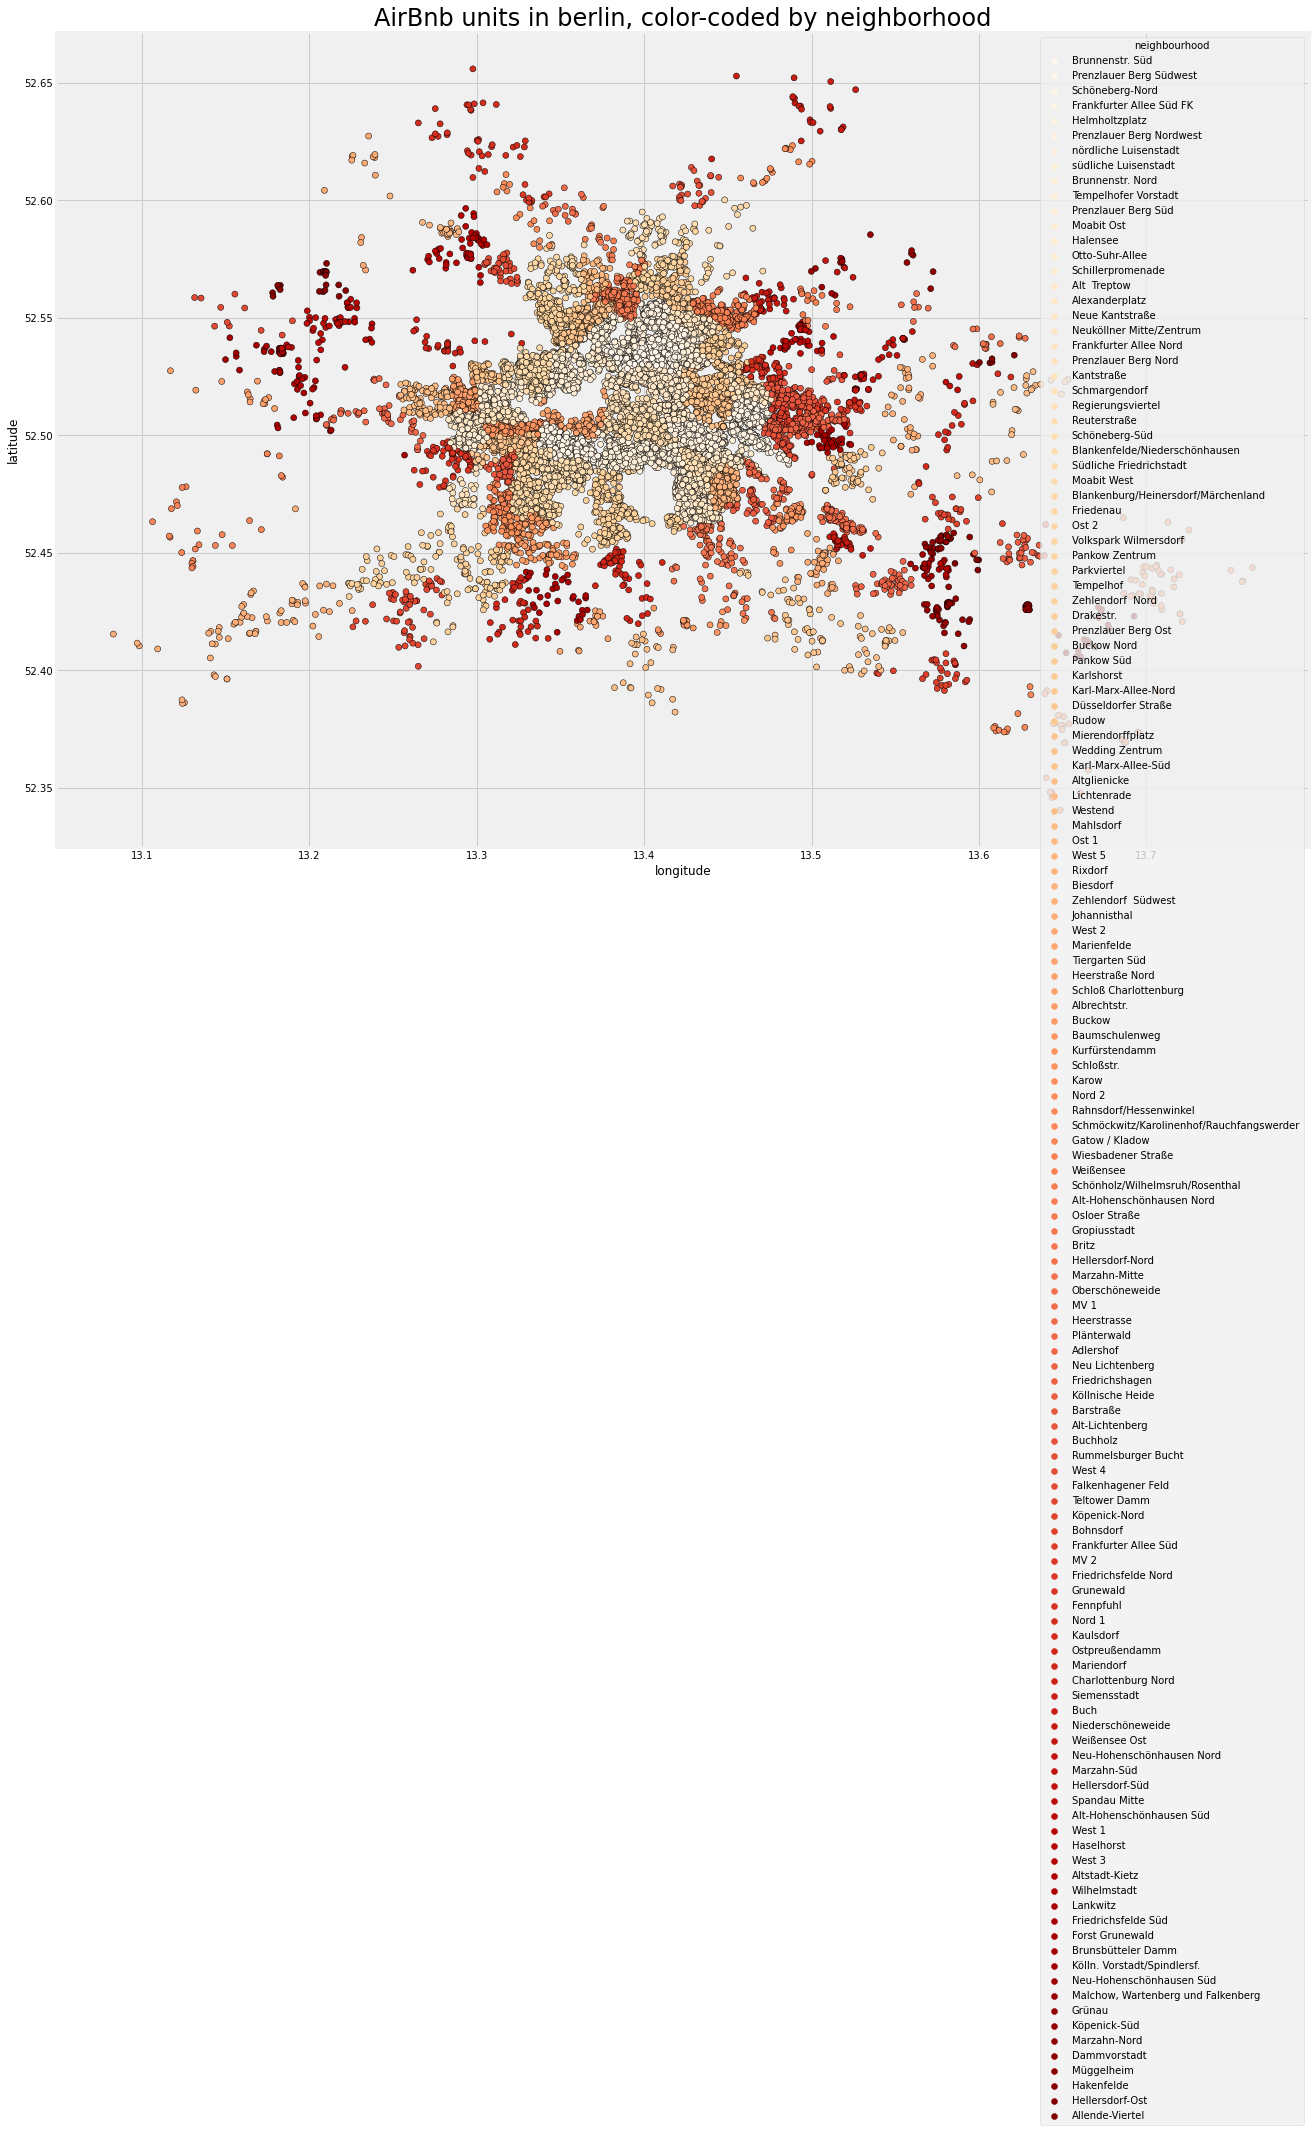

In [12]:
title = 'AirBnb units in Berlin, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_berlin_unique.longitude, master_df_berlin_unique.latitude, hue = master_df_berlin_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_berlin.png')
plt.show()

## Add review data through a join

In [13]:
df_reviews = pd.concat([berlin_raw_df_10_6_2021,raw_df_berlin],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534710,13.418100,Entire home/apt,90,...,4.68,4.53,4.64,4.69,4.92,4.63,f,1.0,0.0,0.0
1,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.543010,13.415340,Private room,33,...,4.85,4.90,4.86,4.85,4.91,4.71,t,0.0,1.0,0.0
2,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.532690,13.418050,Entire home/apt,180,...,5.00,5.00,5.00,5.00,4.86,4.86,f,1.0,0.0,0.0
3,14325,Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.548130,13.403660,Entire home/apt,70,...,5.00,4.84,4.68,4.84,4.58,4.42,f,3.0,0.0,0.0
4,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.503120,13.435080,Entire home/apt,90,...,4.86,4.86,4.93,4.86,4.67,4.71,f,2.0,0.0,0.0
5,17904,Beautiful Kreuzberg studio - 3 months minimum,68997,Matthias,Neukölln,Reuterstraße,52.494190,13.421660,Entire home/apt,47,...,4.82,4.71,4.89,4.92,4.87,4.65,f,1.0,0.0,0.0
6,20858,Designer Loft in Berlin Mitte,71331,Marc,Pankow,Prenzlauer Berg Südwest,52.537110,13.408880,Entire home/apt,169,...,4.60,4.61,4.41,4.40,4.88,4.39,f,1.0,0.0,0.0
7,21869,Studio in the Heart of Kreuzberg,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.504600,13.433740,Entire home/apt,70,...,4.70,4.91,4.77,4.58,4.62,4.58,f,2.0,0.0,0.0
8,22438,WOHNUNG IN BERLIN ★ MITTE,86159,Javier,Mitte,Brunnenstr. Süd,52.534080,13.388710,Entire home/apt,65,...,4.76,4.69,4.82,4.73,4.62,4.69,f,1.0,0.0,0.0
9,22677,Prenzel garden with leafy terrace (quiet Guests),87357,Ramfis,Mitte,Brunnenstr. Süd,52.533550,13.404760,Entire home/apt,120,...,4.79,4.75,4.88,4.87,4.93,4.64,f,1.0,0.0,0.0


## Regression

In [14]:
#df_reviews_.columns

In [15]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [16]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -27.43165315938684
Coefficients:  [ 8.29192509 21.19449679 -1.74283871  0.43284203  1.24827638 -5.0078302
 10.79706956 12.11681728 -9.31110372]
LinearRegression()


In [17]:
y_pred2 = regr.predict(X_)

In [18]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result.head()

,Actual,Predicted,Diff
14746,400,48.016487,-351.983513
15652,400,54.669426,-345.330574
16301,400,54.721839,-345.278161
11622,400,57.927668,-342.072332
14341,399,59.738713,-339.261287


<function matplotlib.pyplot.ylim(*args, **kwargs)>

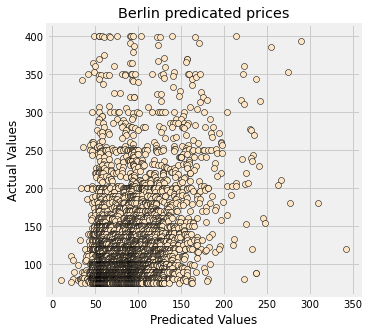

In [20]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicated Values')
plt.ylabel('Actual Values')
plt.title('Berlin predicated prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim